In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import style
style.use('ggplot')
%matplotlib inline

141.93031366947855
4.812654653416985
{0: array([ 0.70353328, -4.52767455]), 1: array([-9.52981151, -7.69781936]), 2: array([-1.72134158,  6.61045437])}


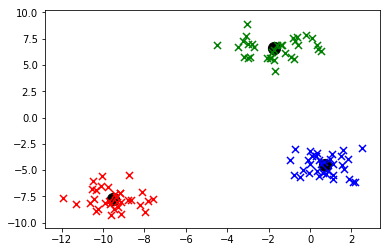

In [14]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std = 1.0, random_state=100)

colors = ["b","r","g","c","k"]

# plt.scatter(X[:,0], X[:,1], c=y)
class K_means():
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        
        self.centroids = {}
        
#         for i in range(self.k):
        self.centroids[0] = data[0]
        self.centroids[1] = data[1]
        self.centroids[2] = data[2]
        
        for i in range(self.max_iter):
            
            self.classifications = {}
            
#             for i in range(self.k):
            
            self.classifications[0] = []
            self.classifications[1] = []
            self.classifications[2] = []
                
            for featureset in data:
                
                distances = [np.linalg.norm( featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
#                 print(self.classifications)
                
                
            prev_centroid = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroid[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100))
                    optimized = False
                
            if optimized:
                break
    
    def predict(self, data):
        distances = [np.linalg.norm( data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distance.index(min(distances))
        return classifications

clf = K_means()
clf.fit(X)
print(clf.centroids) #centroids
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1], marker = "o", s = 150, color = "k")
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker = "x", s = 50, color = color)
        
